In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import nltk
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer
plt.style.use('fivethirtyeight')
sns.set()
plt.rcParams['figure.figsize'] = (12,12)

In [18]:
GRAPH = '../Results/Graphs'
TABLE = '..Results/Tables'
DATA = '../data'
VERSION = 11  #1: Merged All 2:Cleaned
# os.listdir(DATA)

In [19]:
df = pd.read_csv(os.path.join(DATA,'Dataset_v'+str(VERSION) + '.csv'))
# ONET = pd.read_csv(os.path.join(DATA,'ONET_Occupations.csv'))
ONET = pd.read_csv(os.path.join(DATA,'Information_Technology.csv'))
skills = pd.read_csv(os.path.join(DATA,'skills.csv'))

In [20]:
skill_corr_df = pd.DataFrame(index = df.index,columns=skills['Skills'].tolist()).fillna(0)

In [21]:
SKILLS = skill_corr_df.columns.tolist()[:-2]

In [22]:
SKILLS

['PHP',
 'Database',
 'SQL',
 'JavaScript',
 'SEO',
 'Android',
 'CSS',
 'Oracle',
 'HTML',
 'MySQL',
 'C',
 'JAVA',
 'WordPress',
 'Laravel',
 'Linux',
 'jQuery',
 'iOS',
 'Bootstrap',
 'AJAX',
 'OOP',
 'ASP.NET',
 'Angular',
 'SQL Server',
 'QA',
 'Excel',
 'PowerPoint',
 'Word',
 'Photoshop',
 'Illustrator',
 'Python',
 'C#',
 'ERP',
 'HTML5',
 'CSS3',
 'Git',
 'JS',
 'React',
 'AWS',
 'MVC',
 'Windows']

In [23]:
for i , context in enumerate((df['Job_Responsibility'] + df['Job_Context']).values):
    tokens = TreebankWordTokenizer().tokenize(str(context).lower())
    for skill in skills['Skills'].tolist():
        if str(skill).lower() in tokens:
            skill_corr_df.loc[i,skill] += 1

In [24]:
years = list(range(2016,2022))
for year in tqdm(years):
    temp_df = df[df['Year'] == year]
    for i,context in enumerate((temp_df['Job_Responsibility'] + temp_df['Job_Context']).values):
#             if str(skill).lower() in str(context).lower():
            if str('SQL Server').lower() in str(context).lower():
                skill_corr_df.loc[i,'SQL Server'] += 1
            if str('object oriented').lower() in str(context).lower():
                 skill_corr_df.loc[i,'OOP'] += 1
            if str('search engine').lower() in str(context).lower():
                 skill_corr_df.loc[i,'SEO'] += 1
            if str('C#').lower() in str(context).lower():
                 skill_corr_df.loc[i,'C#'] += 1

100%|██████████| 6/6 [00:00<00:00, 10.12it/s]


In [25]:

skill_corr_df.loc[:,'SQL'] -= skill_corr_df.loc[:,'SQL Server']
skill_corr_df.loc[:,'HTML'] += skill_corr_df.loc[:,'HTML5']
skill_corr_df.loc[:,'CSS'] += skill_corr_df.loc[:,'CSS3']
skill_corr_df.loc[:,'JavaScript'] += skill_corr_df.loc[:,'JS']
skill_corr_df.drop(['HTML5','CSS3','JS'],inplace=True,axis=1)

In [26]:
skill_corr_df[skill_corr_df < 0] = 0
skill_corr_df[skill_corr_df > 0] = 1

In [12]:
[SKILLS.remove(x) for x in ['HTML5','CSS3','JS']]

[None, None, None]

In [27]:
SKILLS

['PHP',
 'Database',
 'SQL',
 'JavaScript',
 'SEO',
 'Android',
 'CSS',
 'Oracle',
 'HTML',
 'MySQL',
 'C',
 'JAVA',
 'WordPress',
 'Laravel',
 'Linux',
 'jQuery',
 'iOS',
 'Bootstrap',
 'AJAX',
 'OOP',
 'ASP.NET',
 'Angular',
 'SQL Server',
 'QA',
 'Excel',
 'PowerPoint',
 'Word',
 'Photoshop',
 'Illustrator',
 'Python',
 'C#',
 'ERP',
 'HTML5',
 'CSS3',
 'Git',
 'JS',
 'React',
 'AWS',
 'MVC',
 'Windows']

In [28]:
skill_corr_df['Year'] = df['Year']
skill_corr_df['Name'] = df['Name']
skill_corr_df['Title'] = df['MergedTitle']

In [29]:
skill_corr_df.Title.value_counts()

Software Developers                                7506
Project Management Specialists                     4242
Web Developers                                     3874
Computer Systems Engineers/Architects              2395
Web and Digital Interface Designers                2138
Computer Occupations, All Other                    2024
Computer User Support Specialists                  1990
Business Intelligence Analysts                     1534
Search Marketing Strategists                        945
Network and Computer Systems Administrators         912
Telecommunications Engineering Specialists          823
Information Security Analysts                       708
Computer Network Support Specialists                571
Software Quality Assurance Analysts and Testers     466
Document Management Specialists                     359
Database Administrators                             264
Video Game Designers                                252
Computer Network Architects                     

In [30]:
START_YR = 2016
END_YR = 2020
df['Name'].value_counts()

BJIT Ltd.                                 438
Banglalink                                248
Walton Hi-Tech Industries Ltd.            187
ReliSource Technologies Ltd.              178
BRAC IT Services Limited                  174
                                         ... 
Ministry of Primary and Mass Education      1
LBSC Limited                                1
Amarstock Ltd.                              1
Gulshan Society.                            1
Joyeeta Foundation                          1
Name: Name, Length: 6140, dtype: int64

In [40]:
temp = skill_corr_df[skill_corr_df['Year'].isin([2016,2019])].reset_index()
# temp = temp[temp.Title.isin(['Web Developers','Web and Digital Interface Designers','Web Administrators'])].reset_index()
temp = temp[temp.Title.isin(['Database Architects'])].reset_index()
# temp = temp[temp.Title.isin(['Computer Systems Engineers/Architects'])].reset_index()
temp

,level_0,index,PHP,Database,SQL,JavaScript,SEO,Android,CSS,Oracle,...,Git,React,AWS,MVC,Windows,API,Marketing,Year,Name,Title
0,333,10931,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,BJIT Ltd.,Database Architects
1,334,10932,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,ReliSource Technologies Ltd.,Database Architects
2,919,11517,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,ReliSource Technologies Ltd.,Database Architects
3,920,11518,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,ReliSource Technologies Ltd.,Database Architects
4,1257,11855,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,Square InformatiX Limited,Database Architects
5,1568,12166,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,ReliSource Technologies Ltd.,Database Architects
6,1569,12167,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,ReliSource Technologies Ltd.,Database Architects
7,2040,12638,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,ReliSource Technologies Ltd.,Database Architects
8,2069,12667,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,BJIT Ltd.,Database Architects
9,2135,12733,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,TigerIT Bangladesh Limited,Database Architects


In [141]:
skills_df = pd.read_csv('Skills_df.csv')
skills_df.drop(['Unnamed: 0'],axis=1,inplace=True)
# skills_df
skills_df['Name'] = df['Name']
SKILLS = skills_df.columns
skills_df = skills_df[skills_df['Year'].isin([2016,2019])].reset_index(drop=True)

In [142]:
temp = skills_df.groupby(['Name','Year']).sum()
index = temp.groupby('Name').size() > 1
temp = temp.reset_index()
temp.index = temp.Name
temp = temp[index]
temp =temp.set_index(['Name','Year'],drop=True)

<ipython-input-142-3f4980fdcdae>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = temp[index]


In [143]:
shift_df = pd.DataFrame(index=skills_df.columns,columns = skills_df.columns).fillna(0)
# shift_df

In [144]:

for company in temp.index.get_level_values(0):
    company_df = temp.loc[company]
    for skill1 in company_df.columns:
        if company_df.loc[2016,skill1] > 0:
            for skill2 in company_df.columns:
                if company_df.loc[2019,skill2] > 0:
                    shift_df.loc[skill1,skill2] += (0.9 * company_df.loc[2019,skill2] + 0.1 * company_df.loc[2016,skill1])
                
                
            

In [45]:
shift_df

,Database,Networking,Testing & QA,Java,PHP,JavaScript,API,SQL,jQuery,WordPress,...,Spring,Documentation,CCTV,C#,NodeJS,SQL Server,Design Pattern,Year,Title,Name
Database,885.2,945.8,931.0,241.8,300.2,569.4,656.8,349.4,285.8,121.4,...,110.8,660.8,120.6,188.6,20.6,247.8,257.8,0,0,0
Networking,902.0,1266.6,963.8,307.6,278.0,596.4,681.6,396.0,285.0,111.8,...,127.6,733.0,247.4,216.2,25.0,298.4,274.0,0,0,0
Testing & QA,654.6,746.2,1014.0,258.2,191.8,457.8,586.6,298.4,226.8,60.4,...,111.0,705.4,81.6,118.6,8.4,189.8,207.4,0,0,0
Java,296.0,312.0,423.8,226.0,85.6,200.8,256.4,144.8,106.6,35.4,...,102.8,282.2,26.8,53.4,7.8,55.4,138.2,0,0,0
PHP,426.4,440.4,484.6,152.4,365.8,427.2,485.2,156.6,213.8,148.8,...,70.6,356.8,65.0,51.2,18.6,70.2,151.4,0,0,0
JavaScript,617.2,731.2,773.2,221.2,338.0,628.8,627.8,277.2,334.4,161.0,...,91.8,517.6,90.4,158.4,15.8,181.6,266.0,0,0,0
API,575.4,607.8,748.4,200.8,290.4,460.8,724.6,234.2,222.4,138.6,...,83.8,523.6,54.0,114.8,23.8,141.8,192.0,0,0,0
SQL,411.0,486.0,547.2,153.8,118.0,257.6,337.6,271.4,172.4,26.4,...,70.4,380.8,59.2,123.4,12.8,161.0,140.6,0,0,0
jQuery,410.6,450.4,484.4,146.8,271.4,467.2,451.0,214.2,327.0,119.6,...,84.6,312.0,59.4,128.4,10.4,153.8,188.8,0,0,0
WordPress,138.2,120.8,137.4,41.6,128.8,136.0,166.0,48.6,106.4,119.2,...,28.0,98.0,15.4,20.2,4.0,29.4,64.0,0,0,0


In [153]:
import networkx as nx 
G = nx.DiGraph() 
for i in SKILLS: 
    for j in SKILLS: 
        if shift_df[i][j] >400: 
            G.add_edge(i,j,weight=shift_df[i][j]/100) 

In [160]:
widths = nx.get_edge_attributes(G, 'weight')
edge_weight = np.exp((np.array(list(widths.values()),dtype=float)))/100
edge_weight[edge_weight > 6] = 6

In [161]:
edge_weight

array([5.42397973, 6.        , 1.40892896, 0.92758561, 0.9558348 ,
       5.03709645, 6.        , 1.09508262, 4.39659252, 1.79827849,
       1.60132244, 4.38780812, 2.47151127, 1.26976242, 2.75338156,
       2.49635037, 0.89121446, 1.02924942, 2.36512249, 1.23965091,
       1.598123  , 0.59027297, 0.57397457, 0.56486406])

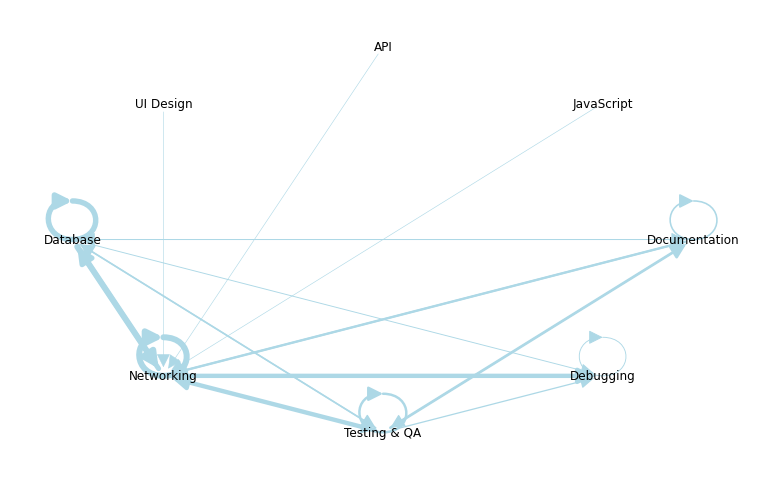

In [163]:
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'
nodelist = G.nodes()

plt.figure(figsize=(12,8))

pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1500,
                       node_color='lightblue',
                       alpha=0
                      )
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=edge_weight,
                       edge_color='lightblue',
                       alpha=1,arrowsize=30)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.grid(False)
plt.savefig('Shift16_19.png',dpi=350)
plt.show()


In [116]:
df[df['ONET Title'].isin(['Computer Systems Engineers/Architects'])]

,JobTitle,Name,PublishDate,IndustryName,Cat_Name,TotalVacancy,number_applicants,JobType,JobLevel,Country,...,MinExp,MaxExp,MinAge,MaxAge,MaleGender,FemaleGender,Job_Context,Job_Responsibility,Year,ONET Title
36,Drive Test Engineer,ONS Telecom (Bangladesh) Limited,2018-01-02 16:18:00,Telecommunication,IT/Telecommunication,0,433,Contract,Entry,Bangladesh,...,1.0,2.0,22.0,30.0,1,0,NaN,Drive Test/Walk Test Engineer works on perform...,2018,Computer Systems Engineers/Architects
64,System Engineer,NASSA GROUP,2018-01-04 09:40:00,Garments/ Textile,IT/Telecommunication,2,1188,FullTime,Entry,Bangladesh,...,3.0,5.0,NaN,NaN,1,1,NaN,Provide a single point of contact for end user...,2018,Computer Systems Engineers/Architects
93,System Engineer,ASA,2018-01-06 17:35:00,NGO/Development,IT/Telecommunication,0,715,FullTime,Entry,Bangladesh,...,3.0,4.0,NaN,NaN,1,1,NaN,"Responsible for managing Servers, Storage (SAN...",2018,Computer Systems Engineers/Architects
102,Assistant Hardware Engineer,Square InformatiX Limited,2018-01-07 16:22:00,Information Technology (IT),IT/Telecommunication,0,0,FullTime,Mid,Bangladesh,...,2.0,3.0,NaN,25.0,1,1,"SQUARE InformatiX Ltd, a sister concern of SQU...","Responsible for repairing all type of CPU, Pri...",2018,Computer Systems Engineers/Architects
123,System Engineer,ATI Limited,2018-01-08 18:20:00,Information Technology (IT),IT/Telecommunication,2,235,FullTime,Mid,Bangladesh,...,4.0,5.0,27.0,33.0,1,1,"ATI Limited, being a leading Software Developm...","Planning, Designing and Implementing Enterpris...",2018,Computer Systems Engineers/Architects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28245,Deep learning & Computer Vision Engineer,Apurba Technologies,2021-06-26 10:32:00,Information Technology (IT),IT/Telecommunication,7,138,FullTime,Mid,Bangladesh,...,2.0,NaN,NaN,NaN,0,0,We are seeking a number of deep learning & com...,Improve our existing Machine Learning systems ...,2021,Computer Systems Engineers/Architects
28257,UI/UX Engineer,WellDev Bangladesh LTD,2021-06-26 21:57:00,Information Technology (IT),IT/Telecommunication,2,0,FullTime,Mid,Bangladesh,...,2.0,3.0,NaN,NaN,0,0,We are looking for a UI/UX Engineer to create ...,"Collaboration: with web developers, users, an...",2021,Computer Systems Engineers/Architects
28265,IT Engineer,Central Insurance Company Ltd.,2021-06-27 16:42:00,Bank/ Non-Bank Fin. Institution,IT/Telecommunication,0,836,FullTime,Entry,Bangladesh,...,2.0,3.0,NaN,30.0,0,0,"Central Insurance Company Ltd, one of the firs...",Higher priority base support for Insurance ERP...,2021,Computer Systems Engineers/Architects
28272,Engineer - Tech Support (Technology Division...,Confidence Group.,2021-06-28 11:01:00,Telecommunication,IT/Telecommunication,0,838,FullTime,Entry,Bangladesh,...,1.0,NaN,NaN,NaN,0,0,Digicon Telecommunication Limited is looking f...,"Installation, link delivery and troubleshootin...",2021,Computer Systems Engineers/Architects


In [96]:
def temp_fn(x):
    if 'Software Engineer' in str(x['JobTitle']): return 'Software Developers'
    else : return x['ONET Title']
df['ONET Title'] = df.apply(temp_fn,axis=1)

In [97]:
df['ONET Title'].value_counts()

Software Developers                                             6772
Web Developers                                                  3424
Information Technology Project Managers                         2768
Web and Digital Interface Designers                             1908
Computer Occupations, All Other                                 1783
Computer User Support Specialists                               1625
Business Intelligence Analysts                                  1396
Computer Systems Engineers/Architects                           1369
Project Management Specialists                                  1025
Computer Programmers                                             998
Search Marketing Strategists                                     846
Network and Computer Systems Administrators                      812
Telecommunications Engineering Specialists                       737
Information Security Analysts                                    640
Computer Network Support Specialis